Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.



# 1. Подготовка данных

#### Для загрузки KNNImputer необходимо обновить библиотеки кодом ниже и перезапустить ядро.

In [98]:
pip install -U scikit-learn --user

Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyRegressor


In [112]:
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

### 1.1. Откройте файлы и изучите их.

In [113]:
gold_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [114]:
gold_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [115]:
gold_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [116]:
gold_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [117]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [118]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [119]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

#### Я открыл данные, посмотрел первые 10 строк каждого датафрейма и посмотрел информацию о них с помощью info()

In [120]:
#pd.options.display.max_rows = 111111
gold_test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [121]:
#pd.options.display.max_rows = 111111
gold_train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [122]:
#pd.options.display.max_rows = 111111
gold_full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

#### Во всех датафреймах присутсвует значительное количество пропусков, в будущем их заполню.

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [123]:
without_nan_train = gold_train.dropna()

#### для нахождения МАЕ я создал отдельный датафрейм в котором я удалил все пропуски

In [124]:
def effect(col):
    C = col['rougher.output.concentrate_au']
    F = col['rougher.input.feed_au']
    T = col['rougher.output.tail_au']
    try:
        recovery = (C*(F-T))/(F*(C-T))*100
        return recovery
    except:
        return np.nan
print(effect(without_nan_train).describe())    

count    11017.000000
mean        82.741888
std         13.590523
min         -0.000000
25%         79.997468
50%         84.847754
75%         89.635149
max        100.000000
dtype: float64


#### я написал функцию для нахождения recovery по заданным колонкам, с помощь describe() посмотрел расположение данных

In [125]:
without_nan_train['rougher.output.recovery'].describe()

count    11017.000000
mean        82.741888
std         13.590523
min          0.000000
25%         79.997468
50%         84.847754
75%         89.635149
max        100.000000
Name: rougher.output.recovery, dtype: float64

#### с помощью describe() я посмотрел аналогичную информацию по целевой колонке, данные оказались такими же как найденные с помощью функции.

In [126]:
mae_train = mean_absolute_error(effect(without_nan_train), without_nan_train['rougher.output.recovery'])
mae_train

9.555596961987514e-15

#### Подсчитав МАЕ я получил результат 9.55, я считаю что обогащение расчитано правильно.

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [127]:
gold_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [128]:
col_list1 = ['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level', 'rougher.output.recovery', 'final.output.recovery']

In [129]:
col_not_in_test = gold_train.drop(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)

In [130]:
col_not_in_test.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
       'final.output.tail_au', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
       'rougher.outp

#### Выше ячейкой я вывел колонки которых нет в тестевых данных. Сюда попали все колонки - .output. и rougher.calculation
#### Это данные которые показывают к примеру - концентрацию после определенного этапа. В жизни мы эти данные можем узнать только по факту работ, а изначально они нам не известны поэтому бесполезны в обучении модели

In [131]:
missing_columns = set(gold_train.columns) - set(gold_test.columns)
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### 1.4. Проведите предобработку данных.

#### при помощь KNNImputer а заполнил пропуски во всех датафреймах, но я не стал заполнять пропуски в целевых признаках, так как  мне кажется что не точные данные окажут негативное воздействие на качество моделей. Так же я не заполнял колонку с датой.

In [132]:
columns = list(gold_full.columns)
columns.remove('rougher.output.recovery')
columns.remove('final.output.recovery')
columns.remove('date')

imputer = KNNImputer()
gold_full[columns] = imputer.fit_transform(gold_full[columns])

In [133]:
gold_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [134]:
columns = list(gold_train.columns)
columns.remove('rougher.output.recovery')
columns.remove('final.output.recovery')
columns.remove('date')

imputer = KNNImputer()
gold_train[columns] = imputer.fit_transform(gold_train[columns])

In [135]:
gold_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [136]:
columns = list(gold_test.columns)
columns.remove('date')

imputer = KNNImputer()
gold_test[columns] = imputer.fit_transform(gold_test[columns])

In [137]:
gold_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

#### Пропуски заполнились успешно.

# 2. Анализ данных

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

[Text(0, 0, 'Сырье'),
 Text(0, 0, 'Флотация'),
 Text(0, 0, 'Первичная очистка'),
 Text(0, 0, 'Финальная')]

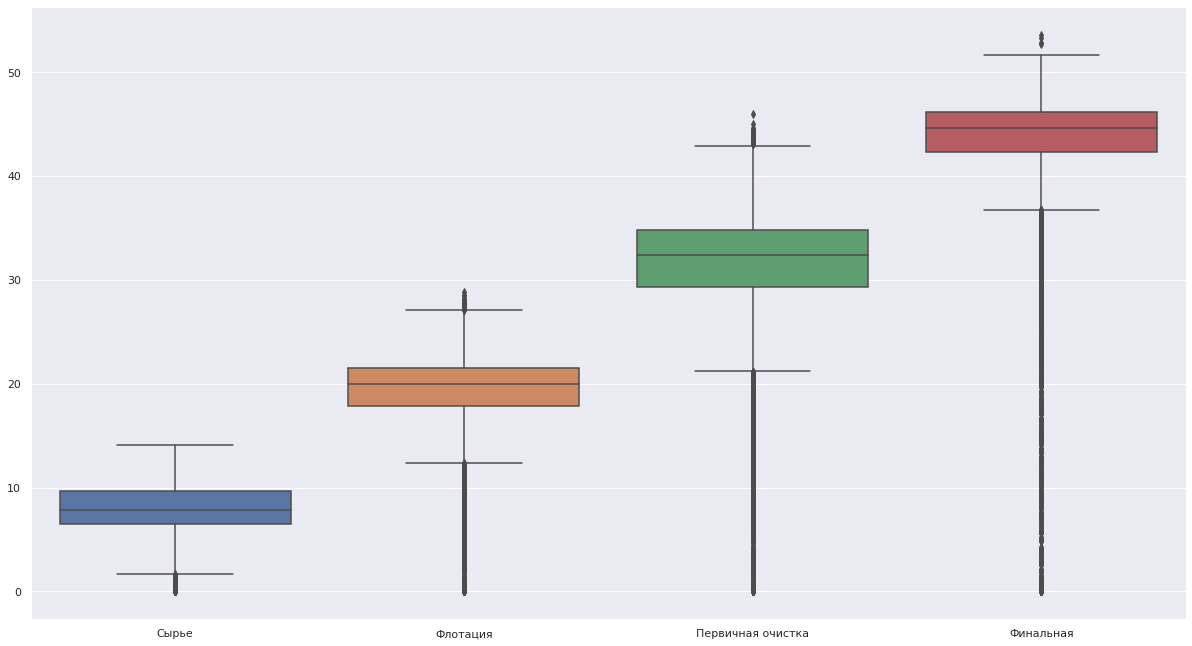

In [138]:
sns.set(rc={'figure.figsize':(20.7,11.27)})

gold_plot = sns.boxplot(data=gold_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']])
gold_plot.set_xticklabels(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная'])

### Построил Boxplots по концентрации золота на различных этапах. На гарфиках видно что золото с каждым этапам постепенно становится больше, в финале концентрация доходит до 40-50% при начальной концентрации всего 3-15%

[Text(0, 0, 'Сырье'),
 Text(0, 0, 'Флотация'),
 Text(0, 0, 'Первичная очистка'),
 Text(0, 0, 'Финальная')]

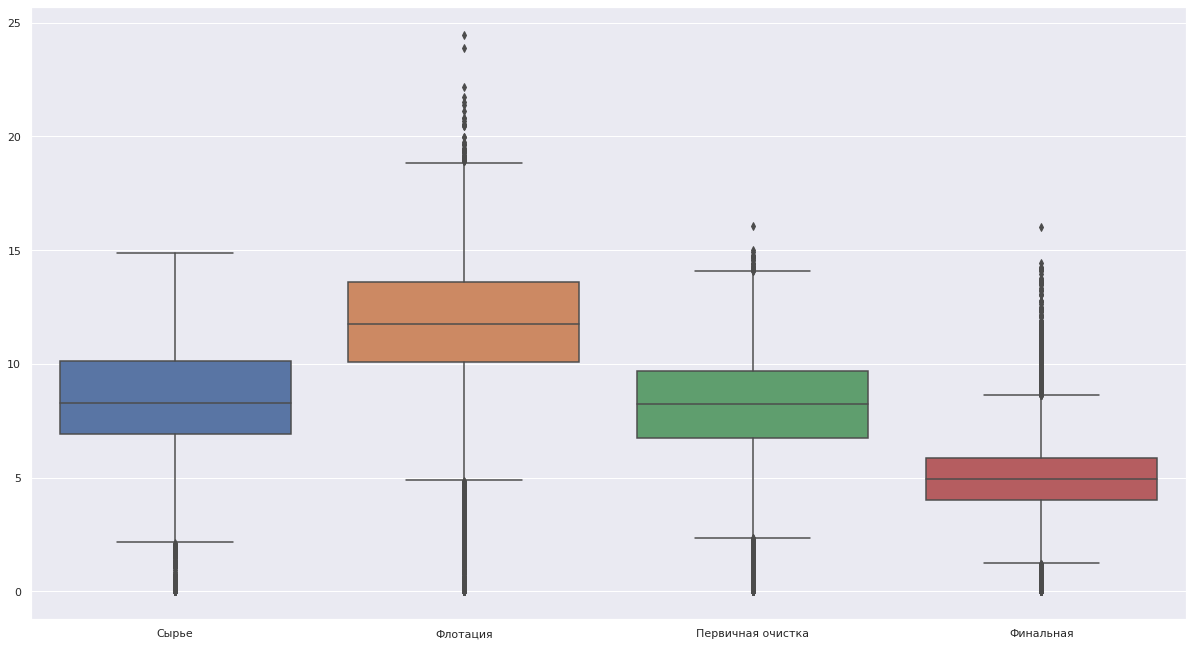

In [139]:
sns.set(rc={'figure.figsize':(20.7,11.27)})
ag_plot = sns.boxplot(data=gold_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']])
ag_plot.set_xticklabels(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная'])

### Построил Boxplots по концентрации серебра на различных этапах. Тут же картина меняется,  концентрация серебра изначально была такая же как и золота, однако же после небольшого повышения после Флотации концентрация идет на спад и в финале мы получаем меньше 10%

[Text(0, 0, 'Сырье'),
 Text(0, 0, 'Флотация'),
 Text(0, 0, 'Первичная очистка'),
 Text(0, 0, 'Финальная')]

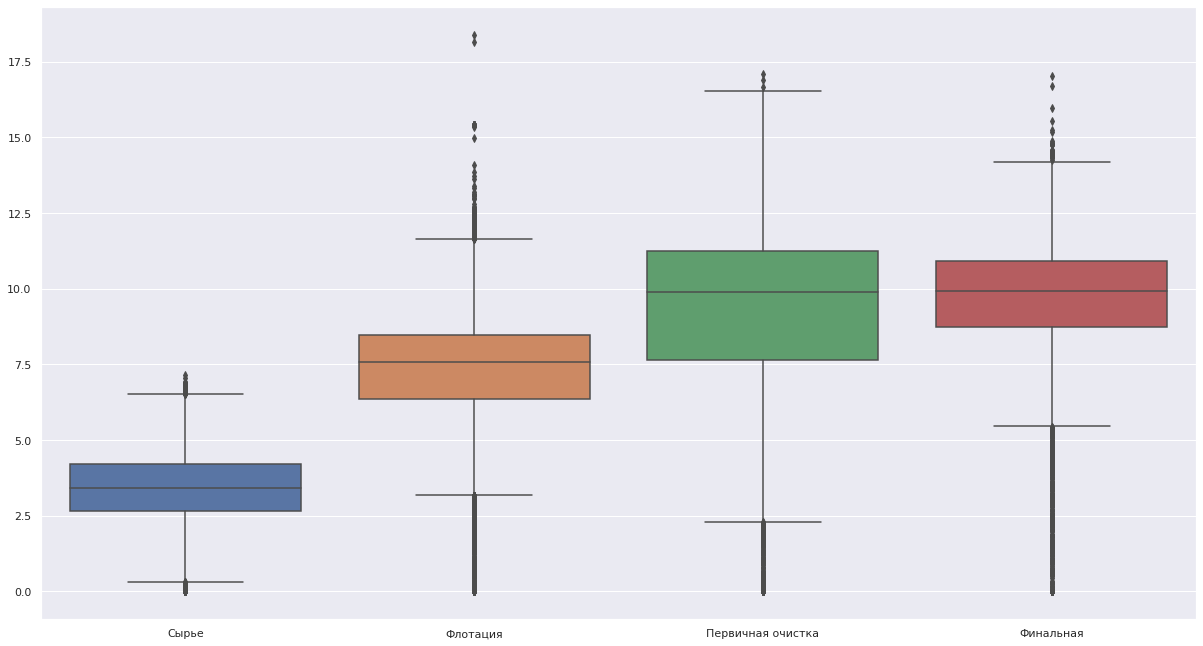

In [140]:
sns.set(rc={'figure.figsize':(20.7,11.27)})
pb_plot = sns.boxplot(data=gold_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']])
pb_plot.set_xticklabels(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная'])

### Построил Boxplots по концентрации серебра на различных этапах. Тут я вижу рост, но небольшой, в финале мы имеем концентрацию 7-11% при начальной 1-6%

### Итог: Тк наша компания занимается золотом, основной упор делается на концентрацию этого металла.

# ---------------------------------------------------------

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

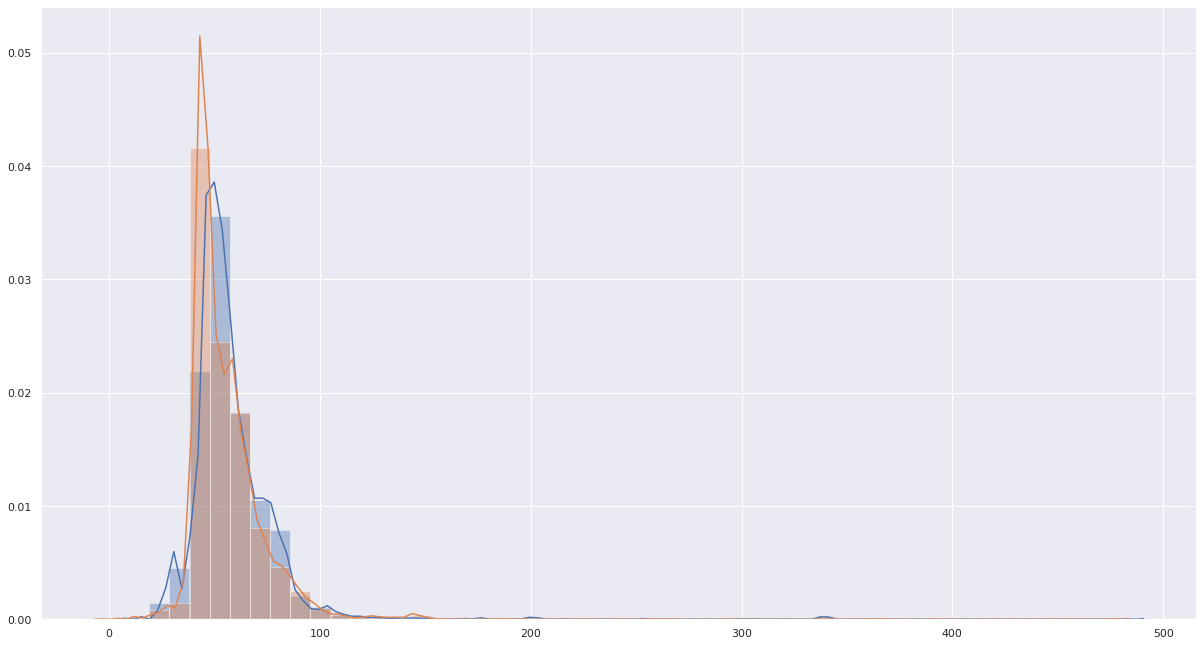

In [141]:
sns.distplot(gold_train[['rougher.input.feed_size']])
sns.distplot(gold_test[['rougher.input.feed_size']])

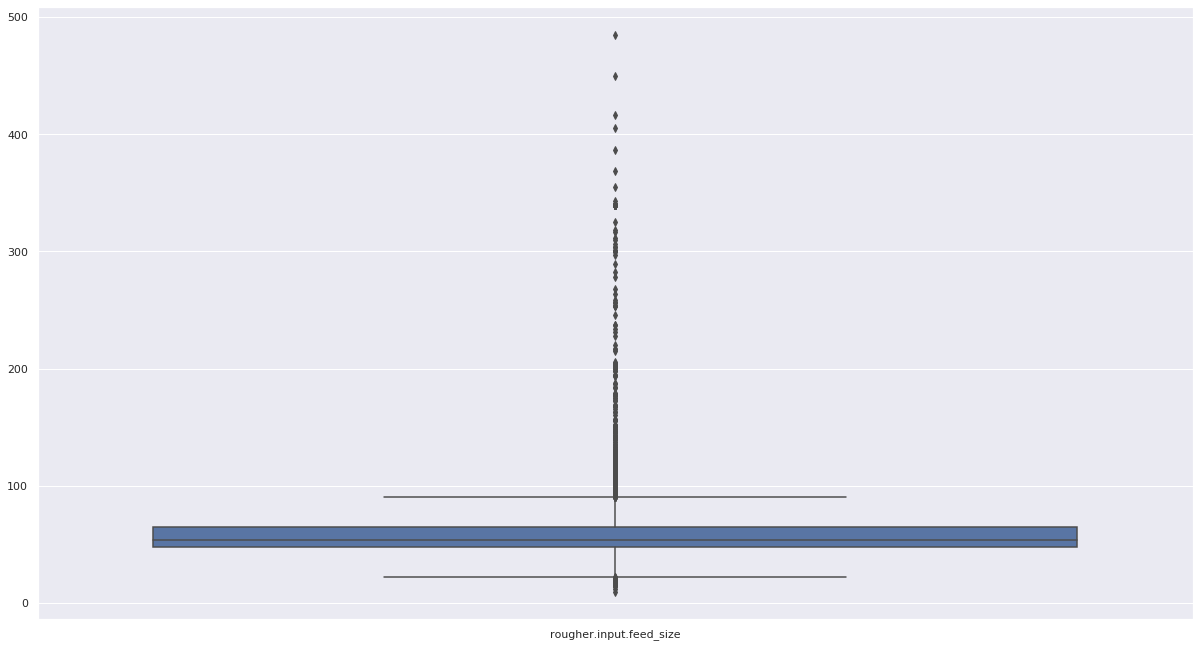

In [142]:
feed_size_plot = sns.boxplot(data = gold_train[['rougher.input.feed_size']])


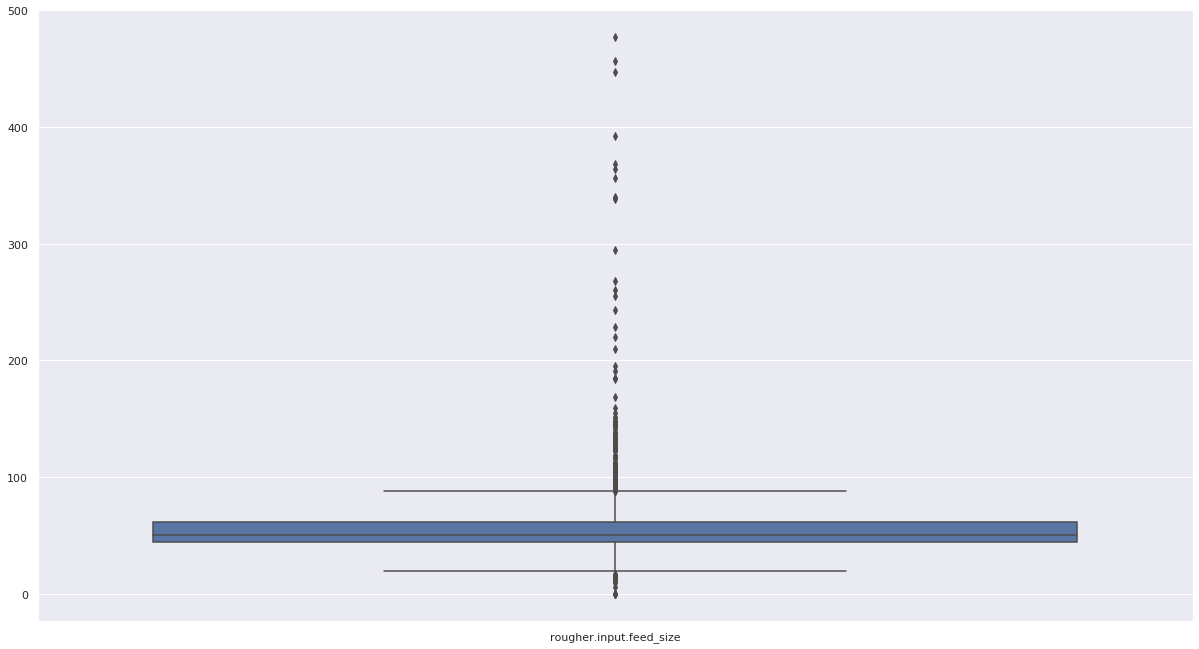

In [143]:
feed_size_plot = sns.boxplot(data = gold_test[['rougher.input.feed_size']])

#### Я построил 2 вида графииков для сравнения размера гарнцл сырья, на обоих графиках результат оказался практически аналогичным 

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

#### создаю общю колонку по концентрации всех веществ в исходном сырье 

In [144]:
gold_full['total_feed'] = gold_full['rougher.input.feed_ag'] + gold_full['rougher.input.feed_au'] + gold_full['rougher.input.feed_pb'] + gold_full['rougher.input.feed_sol']

In [145]:
gold_train['total_feed'] = gold_train['rougher.input.feed_ag'] + gold_train['rougher.input.feed_au'] + gold_train['rougher.input.feed_pb'] + gold_train['rougher.input.feed_sol']

#### создаю общю колонку по концентрации всех веществ после Флортации

In [146]:
gold_full['total_concen_roug'] = gold_full['rougher.output.concentrate_pb'] + gold_full['rougher.output.concentrate_au'] + gold_full['rougher.output.concentrate_ag'] + gold_full['rougher.output.concentrate_sol']

In [147]:
gold_train['total_concen_roug'] = gold_train['rougher.output.concentrate_pb'] + gold_train['rougher.output.concentrate_au'] + gold_train['rougher.output.concentrate_ag'] + gold_train['rougher.output.concentrate_sol']

#### создаю общю колонку по концентрации всех веществ после первичной обработки

In [148]:
gold_full['total_concen_primary'] = gold_full['primary_cleaner.output.concentrate_pb'] + gold_full['primary_cleaner.output.concentrate_au'] + gold_full['primary_cleaner.output.concentrate_ag'] + gold_full['primary_cleaner.output.concentrate_sol']

In [149]:
gold_train['total_concen_primary'] = gold_train['primary_cleaner.output.concentrate_pb'] + gold_train['primary_cleaner.output.concentrate_au'] + gold_train['primary_cleaner.output.concentrate_ag'] + gold_train['primary_cleaner.output.concentrate_sol']

#### создаю общю колонку по концентрации всех веществ финальном концентрате

In [150]:
gold_full['total_concen_final'] = gold_full['final.output.concentrate_pb'] + gold_full['final.output.concentrate_au'] + gold_full['final.output.concentrate_ag'] + gold_full['final.output.concentrate_sol']

In [151]:
gold_train['total_concen_final'] = gold_train['final.output.concentrate_pb'] + gold_train['final.output.concentrate_au'] + gold_train['final.output.concentrate_ag'] + gold_train['final.output.concentrate_sol']

[Text(0, 0, 'Концентрация в руде'),
 Text(0, 0, 'После флотации'),
 Text(0, 0, 'После первичной отчистки'),
 Text(0, 0, 'Финальная концентрация')]

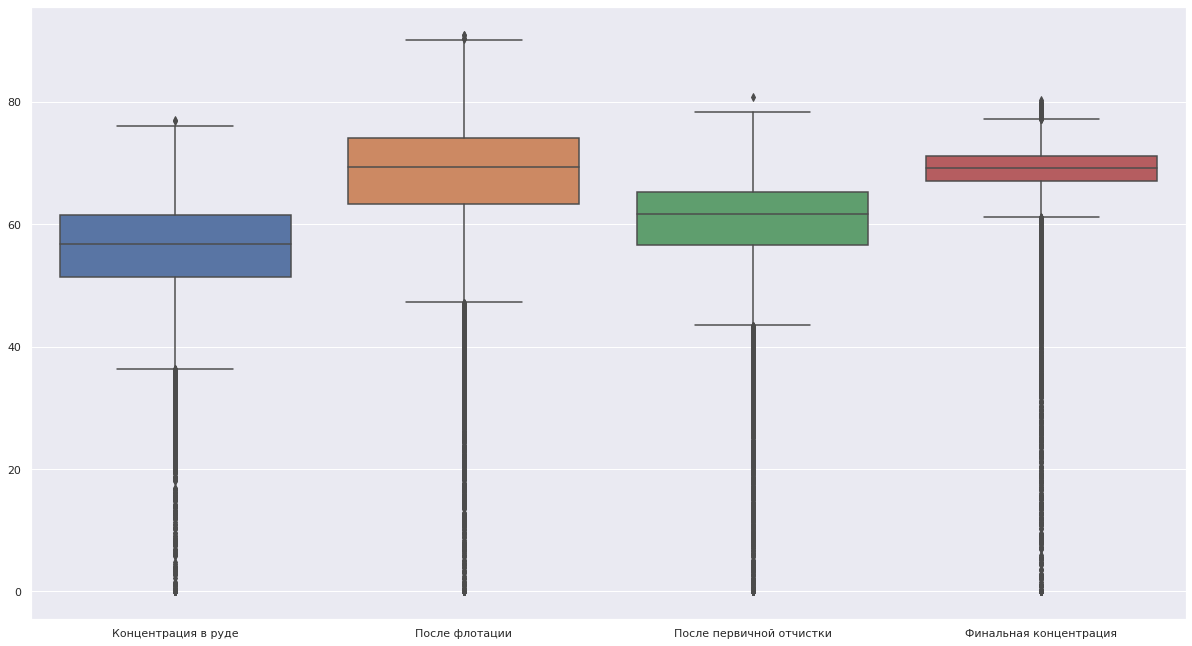

In [152]:
sns.set(rc={'figure.figsize':(20.7,11.27)})
pb_plot = sns.boxplot(data=gold_full[['total_feed', 'total_concen_roug', 'total_concen_primary', 'total_concen_final']])
pb_plot.set_xticklabels(['Концентрация в руде', 'После флотации', 'После первичной отчистки', 'Финальная концентрация'])

### Построил графики концентрации после каждого этапа. Как мне кажется концентрация после фортации выглядит аномально.
### Так же много выбросов в нижней части.

In [153]:
gold_full = gold_full.query('74 > total_feed > 37')

In [154]:
gold_train = gold_train.query('74 > total_feed > 37')

In [155]:
gold_full = gold_full.query('86 > total_concen_roug > 56')

In [156]:
gold_train = gold_train.query('86 > total_concen_roug > 56')

In [157]:
gold_train = gold_train.query('75 > total_concen_primary > 51')

In [158]:
gold_train = gold_train.query('total_concen_final > 64')

In [159]:
gold_full = gold_full.query('75 > total_concen_primary > 51')

In [160]:
gold_full = gold_full.query('76 > total_concen_final > 64')

#### Удаляю выбросы

[Text(0, 0, 'Концентрация в руде'),
 Text(0, 0, 'После флотации'),
 Text(0, 0, 'После первичной отчистки'),
 Text(0, 0, 'Финальная концентрация')]

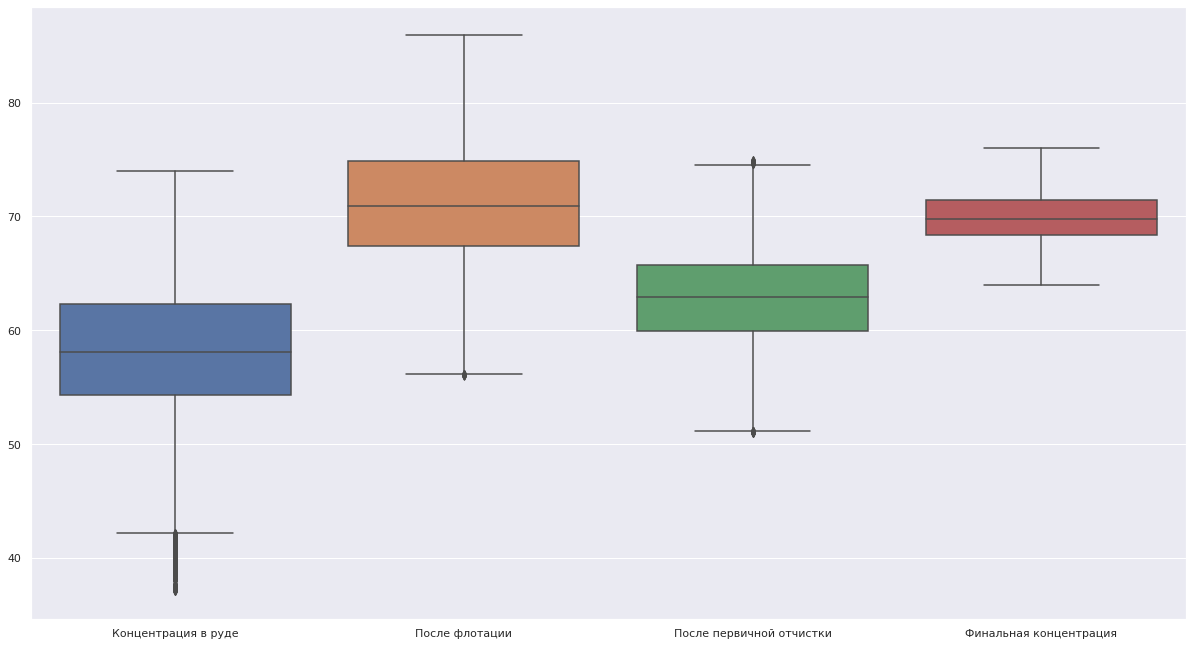

In [161]:
sns.set(rc={'figure.figsize':(20.7,11.27)})
pb_plot = sns.boxplot(data=gold_full[['total_feed', 'total_concen_roug', 'total_concen_primary', 'total_concen_final']])
pb_plot.set_xticklabels(['Концентрация в руде', 'После флотации', 'После первичной отчистки', 'Финальная концентрация'])

In [162]:
gold_train = gold_train.drop(['total_concen_roug', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol'], axis = 1)

In [163]:
gold_full = gold_full.drop(['total_concen_roug', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol'], axis = 1)

#### Концентрация после флортации выглядит аномально, я решил удалить эти данные (это решение улушило метрику smape однако эти столбцы в будущем мы так и так удаляем тк их нет в тестовой, мистика)

# 3. Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [164]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def smape_final(Smape_roug, Smape_final):
    return (1/4) * Smape_roug + (3/4) * Smape_final

### Done

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [165]:
#pd.options.display.max_rows = 111111
gold_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
total_feed                                    0
total_concen_primary                          0
total_concen_final                            0
Length: 86, dtype: int64

In [166]:
gold_train = gold_train.dropna()


#### Изначально я оставил пропуски в колонках с целевыми признаками, однако после удаления выбросов эти все пропуски исчезли, остались единицы, их я просто удалю

In [167]:
(gold_train.isna().sum()).sum()

0

In [168]:
gold_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [169]:
col_list = ['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level', 'rougher.output.recovery', 'final.output.recovery']

In [170]:
actual_train_data = gold_train[col_list]
gold_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [171]:
#gold_train = gold_train.drop(missing_columns - {'final.output.recovery', 'rougher.output.recovery'}, axis=1)
#gold_train.columns

#### Для адекватного обучения я убрал из обучающей выборки все столбцы которых нет в тестевой

In [172]:
target_rogher = actual_train_data['rougher.output.recovery']
target_final = actual_train_data['final.output.recovery']
features_rogher = actual_train_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
features_final = actual_train_data.drop(['final.output.recovery', 'date'], axis = 1)

In [173]:
train_features_r, valid_features_r, train_target_r, valid_target_r = train_test_split(features_rogher, target_rogher, test_size = 0.25, random_state = 12345)

In [174]:
train_features_f, valid_features_f, train_target_f, valid_target_f = train_test_split(features_final, target_final, test_size = 0.25, random_state = 12345)

In [175]:
def cross_val(model, features, target):
    score = cross_val_score(model, features, target, cv=5)
    score = score.sum() / len(score)
    predicted = cross_val_predict(model, features, target, cv=5)
    smape_score = smape(target, predicted)
    return score, smape_score

In [176]:
for i in range(1, 20):
    model1 = DecisionTreeRegressor(random_state = 12345, max_depth = i)
    print('при max_depth :', i, 'Средняя оценка качества и Smape :', cross_val(model1, features_rogher, target_rogher))

при max_depth : 1 Средняя оценка качества и Smape : (-0.6294483117366559, 7.460223527018087)
при max_depth : 2 Средняя оценка качества и Smape : (-0.45939291137835314, 7.097337034352396)
при max_depth : 3 Средняя оценка качества и Smape : (-0.5269961500729023, 6.833089801316876)
при max_depth : 4 Средняя оценка качества и Smape : (-0.42073363293830396, 6.446260425342254)
при max_depth : 5 Средняя оценка качества и Smape : (-0.5661352065058061, 6.828270374702082)
при max_depth : 6 Средняя оценка качества и Smape : (-0.5873490788146691, 6.905368705752533)
при max_depth : 7 Средняя оценка качества и Smape : (-0.6439760015465043, 7.149121804075296)
при max_depth : 8 Средняя оценка качества и Smape : (-0.7345910605014803, 7.387434971062851)
при max_depth : 9 Средняя оценка качества и Smape : (-0.9814440289253042, 7.840385361544996)
при max_depth : 10 Средняя оценка качества и Smape : (-1.0231693863471036, 7.9998991251650775)
при max_depth : 11 Средняя оценка качества и Smape : (-1.134524478

In [177]:
model2 = LinearRegression()
cross_val(model2, features_rogher, target_rogher)

(-0.5570006138622505, 6.59050453017879)

### Циклы будут считаться пол дня, я ниже сохранил готовый результат

In [178]:
for i in range(10, 51, 5):
    for j in range(1, 20):
        model3 = RandomForestRegressor(random_state = 12345, n_estimators = i, max_depth = j)
        print('при n estimators -', i, 'и при max_depth - ', j, 'Средняя оценка качества и Smape :', cross_val(model3, features_rogher, target_rogher))

при n estimators - 10 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5731513559190035, 7.321354379257259)
при n estimators - 10 и при max_depth -  2 Средняя оценка качества и Smape : (-0.34108827571734723, 6.749300726665928)
при n estimators - 10 и при max_depth -  3 Средняя оценка качества и Smape : (-0.38895020823732257, 6.674187741758012)


KeyboardInterrupt: 

#при n estimators - 10 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5731513559190035, 7.321354379257259)
#при n estimators - 10 и при max_depth -  2 Средняя оценка качества и Smape : (-0.34108827571734723, 6.749300726665928)
#при n estimators - 10 и при max_depth -  3 Средняя оценка качества и Smape : (-0.38895020823732257, 6.674187741758012)
#при n estimators - 10 и при max_depth -  4 Средняя оценка качества и Smape : (-0.4669570776739347, 7.057774139006338)
#при n estimators - 10 и при max_depth -  5 Средняя оценка качества и Smape : (-0.4863069701874597, 7.092698488773413)
##при n estimators - 10 и при max_depth -  6 Средняя оценка качества и Smape : (-0.5009769835228409, 7.10936592221629)
#при n estimators - 10 и при max_depth -  7 Средняя оценка качества и Smape : (-0.48850219314909304, 7.099633931946876)
#при n estimators - 10 и при max_depth -  8 Средняя оценка качества и Smape : (-0.5447603628732345, 7.234103566678355)
#при n estimators - 10 и при max_depth -  9 Средняя оценка качества и Smape : (-0.567814666130699, 7.235891258494506)
#при n estimators - 10 и при max_depth -  10 Средняя оценка качества и Smape : (-0.5250578058545975, 7.12326253383574)
#при n estimators - 10 и при max_depth -  11 Средняя оценка качества и Smape : (-0.5654682022862211, 7.257499642300191)
#при n estimators - 10 и при max_depth -  12 Средняя оценка качества и Smape : (-0.6262703904372493, 7.340414817974301)
#при n estimators - 10 и при max_depth -  13 Средняя оценка качества и Smape : (-0.6525653621505176, 7.395857084261004)
#при n estimators - 10 и при max_depth -  14 Средняя оценка качества и Smape : (-0.7617037868478145, 7.535266161735415)
#при n estimators - 10 и при max_depth -  15 Средняя оценка качества и Smape : (-0.8149615550427441, 7.686953289600251)
#при n estimators - 10 и при max_depth -  16 Средняя оценка качества и Smape : (-0.6757920843342541, 7.473628138013169)
#при n estimators - 10 и при max_depth -  17 Средняя оценка качества и Smape : (-0.5786121452908537, 7.298307132567044)
#при n estimators - 10 и при max_depth -  18 Средняя оценка качества и Smape : (-0.7775214568785175, 7.620489252629893)
#при n estimators - 10 и при max_depth -  19 Средняя оценка качества и Smape : (-0.7164029498814594, 7.518422312530699)
#при n estimators - 15 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5378178297476232, 7.250241500707045)
#при n estimators - 15 и при max_depth -  2 Средняя оценка качества и Smape : (-0.3314998445779544, 6.73214011678622)
#при n estimators - 15 и при max_depth -  3 Средняя оценка качества и Smape : (-0.3001363250035123, 6.50458550623788)
#при n estimators - 15 и при max_depth -  4 Средняя оценка качества и Smape : (-0.4293971514506348, 6.987426186135014)
#при n estimators - 15 и при max_depth -  5 Средняя оценка качества и Smape : (-0.4488889731478343, 7.046631105918575)
#при n estimators - 15 и при max_depth -  6 Средняя оценка качества и Smape : (-0.4449214904060783, 7.033305324310683)
##при n estimators - 15 и при max_depth -  7 Средняя оценка качества и Smape : (-0.4707120652159936, 7.087949830202836)
#при n estimators - 15 и при max_depth -  8 Средняя оценка качества и Smape : (-0.4875116476682243, 7.179298001213528)
#при n estimators - 15 и при max_depth -  9 Средняя оценка качества и Smape : (-0.5374321038876012, 7.246950497994814)
#при n estimators - 15 и при max_depth -  10 Средняя оценка качества и Smape : (-0.5319006600807665, 7.193602296960212)
#при n estimators - 15 и при max_depth -  11 Средняя оценка качества и Smape : (-0.5709208122811764, 7.318222251250576)
#при n estimators - 15 и при max_depth -  12 Средняя оценка качества и Smape : (-0.587565653970486, 7.336981522188286)
#при n estimators - 15 и при max_depth -  13 Средняя оценка качества и Smape : (-0.6045460511305478, 7.3670417692520624)
#при n estimators - 15 и при max_depth -  14 Средняя оценка качества и Smape : (-0.6573862821867923, 7.434405603606719)
#при n estimators - 15 и при max_depth -  15 Средняя оценка качества и Smape : (-0.749726255580837, 7.622521300919151)
#при n estimators - 15 и при max_depth -  16 Средняя оценка качества и Smape : (-0.6529973175142787, 7.480391547380677)
#при n estimators - 15 и при max_depth -  17 Средняя оценка качества и Smape : (-0.5803927143704354, 7.354507352176765)
#при n estimators - 15 и при max_depth -  18 Средняя оценка качества и Smape : (-0.6792158617288229, 7.510295508051829)
#при n estimators - 15 и при max_depth -  19 Средняя оценка качества и Smape : (-0.6566176856706651, 7.488892037488267)
#при n estimators - 20 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5384019528602852, 7.255757175595433)
#при n estimators - 20 и при max_depth -  2 Средняя оценка качества и Smape : (-0.3217995275564329, 6.706149234207378)
#при n estimators - 20 и при max_depth -  3 Средняя оценка качества и Smape : (-0.3111249010826913, 6.527283260319608)
#при n estimators - 20 и при max_depth -  4 Средняя оценка качества и Smape : (-0.3453287231548555, 6.765967073832353)
#при n estimators - 20 и при max_depth -  5 Средняя оценка качества и Smape : (-0.3602397210530968, 6.829512854270794)
#при n estimators - 20 и при max_depth -  6 Средняя оценка качества и Smape : (-0.3410929887544936, 6.79423600779254)
#при n estimators - 20 и при max_depth -  7 Средняя оценка качества и Smape : (-0.380314930569838, 6.891020326110747)
#при n estimators - 20 и при max_depth -  8 Средняя оценка качества и Smape : (-0.40445140538607943, 6.983875467481852)
#при n estimators - 20 и при max_depth -  9 Средняя оценка качества и Smape : (-0.41822728108830987, 6.967807979208602)
#при n estimators - 20 и при max_depth -  10 Средняя оценка качества и Smape : (-0.41980841354744747, 6.952024298240936)
#при n estimators - 20 и при max_depth -  11 Средняя оценка качества и Smape : (-0.4461688399887116, 7.03011601045948)
###при n estimators - 20 и при max_depth -  12 Средняя оценка качества и Smape : (-0.4734664412581653, 7.084039309302241)
#при n estimators - 20 и при max_depth -  13 Средняя оценка качества и Smape : (-0.4744480464747743, 7.073198430513947)
#при n estimators - 20 и при max_depth -  14 Средняя оценка качества и Smape : (-0.5235094219106025, 7.165039868157925)
#при n estimators - 20 и при max_depth -  15 Средняя оценка качества и Smape : (-0.5916715829612306, 7.314585944036963)
#при n estimators - 20 и при max_depth -  16 Средняя оценка качества и Smape : (-0.5178780494137674, 7.171724236794766)
#при n estimators - 20 и при max_depth -  17 Средняя оценка качества и Smape : (-0.4556023681762243, 7.0708442365164945)
#при n estimators - 20 и при max_depth -  18 Средняя оценка качества и Smape : (-0.5305242024072347, 7.176681355216855)
#при n estimators - 20 и при max_depth -  19 Средняя оценка качества и Smape : (-0.5206391694703976, 7.195230229739741)
#при n estimators - 25 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5388313562455442, 7.260001415354663)
#при n estimators - 25 и при max_depth -  2 Средняя оценка качества и Smape : (-0.329617498902373, 6.735018180036571)
#при n estimators - 25 и при max_depth -  3 Средняя оценка качества и Smape : (-0.30569520352038265, 6.526797092114448)
#при n estimators - 25 и при max_depth -  4 Средняя оценка качества и Smape : (-0.30677461911341963, 6.673516161622882)
#при n estimators - 25 и при max_depth -  5 Средняя оценка качества и Smape : (-0.33727241170636135, 6.7693560358192455)
#при n estimators - 25 и при max_depth -  6 Средняя оценка качества и Smape : (-0.3385505359677098, 6.7788090762542605)
#при n estimators - 25 и при max_depth -  7 Средняя оценка качества и Smape : (-0.3536266505248541, 6.811191220858025)
#при n estimators - 25 и при max_depth -  8 Средняя оценка качества и Smape : (-0.38520823343024235, 6.90602805658537)
#при n estimators - 25 и при max_depth -  9 Средняя оценка качества и Smape : (-0.39380815323622953, 6.889179681408465)
##при n estimators - 25 и при max_depth -  10 Средняя оценка качества и Smape : (-0.4087974674296152, 6.900909243589222)
#при n estimators - 25 и при max_depth -  11 Средняя оценка качества и Smape : (-0.43228643634649533, 6.962598442362023)
#при n estimators - 25 и при max_depth -  12 Средняя оценка качества и Smape : (-0.46370416795583835, 7.0353168313420085)
#при n estimators - 25 и при max_depth -  13 Средняя оценка качества и Smape : (-0.46155526864732954, 7.017185441196998)

#при n estimators - 25 и при max_depth -  14 Средняя оценка качества и Smape : (-0.4954109222293003, 7.0777120875668595)#
#при n estimators - 25 и при max_depth -  15 Средняя оценка качества и Smape : (-0.5650935202077418, 7.228485133032334)
#при n estimators - 25 и при max_depth -  16 Средняя оценка качества и Smape : (-0.5027191869307674, 7.109677791401026)
#при n estimators - 25 и при max_depth -  17 Средняя оценка качества и Smape : (-0.4497431607865955, 7.017817464842426)
#при n estimators - 25 и при max_depth -  18 Средняя оценка качества и Smape : (-0.5135974494592108, 7.1088344521233795)
#при n estimators - 25 и при max_depth -  19 Средняя оценка качества и Smape : (-0.4983245157619113, 7.1001780148282)
#при n estimators - 30 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5413495987555195, 7.271938037004308)
#при n estimators - 30 и при max_depth -  2 Средняя оценка качества и Smape : (-0.33724416493522735, 6.769347063650131)
#при n estimators - 30 и при max_depth -  3 Средняя оценка качества и Smape : (-0.3128918385013489, 6.550388734757879)
#при n estimators - 30 и при max_depth -  4 Средняя оценка качества и Smape : (-0.32117344708578327, 6.71757506589859)
#при n estimators - 30 и при max_depth -  5 Средняя оценка качества и Smape : (-0.3798038032143896, 6.8823693506456545)
#при n estimators - 30 и при max_depth -  6 Средняя оценка качества и Smape : (-0.39087566756773584, 6.90058543863245)
#при n estimators - 30 и при max_depth -  7 Средняя оценка качества и Smape : (-0.3876167609909625, 6.91437607860416)
#при n estimators - 30 и при max_depth -  8 Средняя оценка качества и Smape : (-0.4381025760773717, 7.016091488405904)
#при n estimators - 30 и при max_depth -  9 Средняя оценка качества и Smape : (-0.42062453858409327, 6.961632044880057)
#при n estimators - 30 и при max_depth -  10 Средняя оценка качества и Smape : (-0.44985717160789696, 6.998067617507884)
#при n estimators - 30 и при max_depth -  11 Средняя оценка качества и Smape : (-0.47282151933069494, 7.044133860841598)
#при n estimators - 30 и при max_depth -  12 Средняя оценка качества и Smape : (-0.514955312951011, 7.151542708955506)
#при n estimators - 30 и при max_depth -  13 Средняя оценка качества и Smape : (-0.48555352757222237, 7.09440958336225)
#при n estimators - 30 и при max_depth -  14 Средняя оценка качества и Smape : (-0.5133888166829337, 7.143062997236289)
#при n estimators - 30 и при max_depth -  15 Средняя оценка качества и Smape : (-0.5826700846437574, 7.286461331333375)
#при n estimators - 30 и при max_depth -  16 Средняя оценка качества и Smape : (-0.5200173071155947, 7.179377930781657)
#при n estimators - 30 и при max_depth -  17 Средняя оценка качества и Smape : (-0.4888831406473666, 7.119258661048268)
#при n estimators - 30 и при max_depth -  18 Средняя оценка качества и Smape : (-0.5228280229931681, 7.160670784549856)
#при n estimators - 30 и при max_depth -  19 Средняя оценка качества и Smape : (-0.5431760682715447, 7.212801799391265)
#при n estimators - 35 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5300117543487077, 7.246718949265686)
#при n estimators - 35 и при max_depth -  2 Средняя оценка качества и Smape : (-0.3287503302126949, 6.739172516208533)
#при n estimators - 35 и при max_depth -  3 Средняя оценка качества и Smape : (-0.297688255793567, 6.519438777328682)
#при n estimators - 35 и при max_depth -  4 Средняя оценка качества и Smape : (-0.3010577258052774, 6.660988918779559)
#при n estimators - 35 и при max_depth -  5 Средняя оценка качества и Smape : (-0.35639804978804024, 6.819986059938831)
#при n estimators - 35 и при max_depth -  6 Средняя оценка качества и Smape : (-0.3756368980181809, 6.849177728713507)
#при n estimators - 35 и при max_depth -  7 Средняя оценка качества и Smape : (-0.35949973180188094, 6.835253578103952)
#при n estimators - 35 и при max_depth -  8 Средняя оценка качества и Smape : (-0.40245830511702535, 6.926263971568048)
#при n estimators - 35 и при max_depth -  9 Средняя оценка качества и Smape : (-0.39269173940838087, 6.894388549176809)
#при n estimators - 35 и при max_depth -  10 Средняя оценка качества и Smape : (-0.41151855754177813, 6.911945990384804)
#при n estimators - 35 и при max_depth -  11 Средняя оценка качества и Smape : (-0.4320359701366323, 6.946579887744098)
#при n estimators - 35 и при max_depth -  12 Средняя оценка качества и Smape : (-0.4760755186251947, 7.05597483426806)
#при n estimators - 35 и при max_depth -  13 Средняя оценка качества и Smape : (-0.43713070303750223, 6.975740804157311)
#при n estimators - 35 и при max_depth -  14 Средняя оценка качества и Smape : (-0.46411195872335254, 7.024598640004693)
#при n estimators - 35 и при max_depth -  15 Средняя оценка качества и Smape : (-0.5225081320474999, 7.150096981513978)
#при n estimators - 35 и при max_depth -  16 Средняя оценка качества и Smape : (-0.4671896972013355, 7.042689077420182)
#при n estimators - 35 и при max_depth -  17 Средняя оценка качества и Smape : (-0.4426147939190326, 7.000521903657721)
#при n estimators - 35 и при max_depth -  18 Средняя оценка качества и Smape : (-0.46903851007940905, 7.036427462038854)
##при n estimators - 35 и при max_depth -  19 Средняя оценка качества и Smape : (-0.4951333641683375, 7.101650608865871)
#при n estimators - 40 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5328007377422446, 7.256382780575892)
#при n estimators - 40 и при max_depth -  2 Средняя оценка качества и Smape : (-0.3226796673682858, 6.716660322522033)
#при n estimators - 40 и при max_depth -  3 Средняя оценка качества и Smape : (-0.29150223524271424, 6.499643333737057)
#при n estimators - 40 и при max_depth -  4 Средняя оценка качества и Smape : (-0.2797668895648974, 6.598667191867554)
#при n estimators - 40 и при max_depth -  5 Средняя оценка качества и Smape : (-0.33129268246877286, 6.758115632325922)
#при n estimators - 40 и при max_depth -  6 Средняя оценка качества и Smape : (-0.34803631739020946, 6.787140342576421)
#при n estimators - 40 и при max_depth -  7 Средняя оценка качества и Smape : (-0.3279208306366519, 6.766836331295496)
#при n estimators - 40 и при max_depth -  8 Средняя оценка качества и Smape : (-0.36372269871577434, 6.844187872893868)
#при n estimators - 40 и при max_depth -  9 Средняя оценка качества и Smape : (-0.35792723881423305, 6.817635430288758)
##при n estimators - 40 и при max_depth -  10 Средняя оценка качества и Smape : (-0.36959615636206133, 6.830757174879253)
#при n estimators - 40 и при max_depth -  11 Средняя оценка качества и Smape : (-0.4000219082843005, 6.888867622559112)
#при n estimators - 40 и при max_depth -  12 Средняя оценка качества и Smape : (-0.4298946447470337, 6.9610511805723005)
#при n estimators - 40 и при max_depth -  13 Средняя оценка качества и Smape : (-0.403887783110717, 6.906735294175774)
#при n estimators - 40 и при max_depth -  14 Средняя оценка качества и Smape : (-0.4269318635087963, 6.954348231799336)
#при n estimators - 40 и при max_depth -  15 Средняя оценка качества и Smape : (-0.47750986810103474, 7.068576209655027)
#при n estimators - 40 и при max_depth -  16 Средняя оценка качества и Smape : (-0.42729385869923997, 6.96837527132607)
#при n estimators - 40 и при max_depth -  17 Средняя оценка качества и Smape : (-0.4067095944803724, 6.930054163442355)
##при n estimators - 40 и при max_depth -  18 Средняя оценка качества и Smape : (-0.4252321980705527, 6.946788938304288)
#при n estimators - 40 и при max_depth -  19 Средняя оценка качества и Smape : (-0.4489555018882225, 7.008563620441203)
#при n estimators - 45 и при max_depth -  1 Средняя оценка качества и Smape : (-0.5334449218624724, 7.255036698406425)
#при n estimators - 45 и при max_depth -  2 Средняя оценка качества и Smape : (-0.32526809696837694, 6.72687478913024)
#при n estimators - 45 и при max_depth -  3 Средняя оценка качества и Smape : (-0.2806594266250809, 6.489446308326766)
#при n estimators - 45 и при max_depth -  4 Средняя оценка качества и Smape : (-0.2585503255535051, 6.554930207991316)
#при n estimators - 45 и при max_depth -  5 Средняя оценка качества и Smape : (-0.3070989777594158, 6.712628745376241)
#при n estimators - 45 и при max_depth -  6 Средняя оценка качества и Smape : (-0.3292775409604216, 6.75166078321677)

#при n estimators - 45 и при max_depth -  7 Средняя оценка качества и Smape : (-0.3138330780940478, 6.74362170907116)
#при n estimators - 45 и при max_depth -  8 Средняя оценка качества и Smape : (-0.34552959489111734, 6.807509972712998)
#при n estimators - 45 и при max_depth -  9 Средняя оценка качества и Smape : (-0.36241165881444753, 6.844149176451696)
#при n estimators - 45 и при max_depth -  10 Средняя оценка качества и Smape : (-0.3748205648813534, 6.866077043142599)
#при n estimators - 45 и при max_depth -  11 Средняя оценка качества и Smape : (-0.3850733455761677, 6.85996942216171)
#при n estimators - 45 и при max_depth -  12 Средняя оценка качества и Smape : (-0.41633912365280557, 6.933004073901114)
#при n estimators - 45 и при max_depth -  13 Средняя оценка качества и Smape : (-0.4069404269272276, 6.927068672019402)
#при n estimators - 45 и при max_depth -  14 Средняя оценка качества и Smape : (-0.4168866306806562, 6.9332462629249045)
#при n estimators - 45 и при max_depth -  15 Средняя оценка качества и Smape : (-0.47337900149501533, 7.071556367286449)
#при n estimators - 45 и при max_depth -  16 Средняя оценка качества и Smape : (-0.43819102690863493, 7.007868230641952)
#при n estimators - 45 и при max_depth -  17 Средняя оценка качества и Smape : (-0.3973714711942355, 6.902244575286413)
#при n estimators - 45 и при max_depth -  18 Средняя оценка качества и Smape : (-0.43117149317047704, 6.981553827729114)
#при n estimators - 45 и при max_depth -  19 Средняя оценка качества и Smape : (-0.439268111644047, 6.990137588254364)
#при n estimators - 50 и при max_depth -  1 Средняя оценка качества и Smape : (-0.542755587140761, 7.277595196297428)
#при n estimators - 50 и при max_depth -  2 Средняя оценка качества и Smape : (-0.3233488986803271, 6.722037572679332)
#при n estimators - 50 и при max_depth -  3 Средняя оценка качества и Smape : (-0.284489998076757, 6.496315548695987)
#при n estimators - 50 и при max_depth -  4 Средняя оценка качества и Smape : (-0.2569242655388718, 6.537655912480588)
#при n estimators - 50 и при max_depth -  5 Средняя оценка качества и Smape : (-0.3057449342337685, 6.6937142350097005)
#при n estimators - 50 и при max_depth -  6 Средняя оценка качества и Smape : (-0.3197883914595788, 6.712959021328145)
#при n estimators - 50 и при max_depth -  7 Средняя оценка качества и Smape : (-0.3000944099252843, 6.6952467918184775)
#при n estimators - 50 и при max_depth -  8 Средняя оценка качества и Smape : (-0.3276456361068811, 6.751794964921381)
#при n estimators - 50 и при max_depth -  9 Средняя оценка качества и Smape : (-0.33973468541072704, 6.777474972063849)
#при n estimators - 50 и при max_depth -  10 Средняя оценка качества и Smape : (-0.35718177957787733, 6.811350110695216)
#при n estimators - 50 и при max_depth -  11 Средняя оценка качества и Smape : (-0.36641632253262624, 6.803372035991436)
#при n estimators - 50 и при max_depth -  12 Средняя оценка качества и Smape : (-0.39434469950149525, 6.874324216901011)
#при n estimators - 50 и при max_depth -  13 Средняя оценка качества и Smape : (-0.3823840491303706, 6.858693727645401)
#при n estimators - 50 и при max_depth -  14 Средняя оценка качества и Smape : (-0.3902129118538892, 6.862805264565907)
#при n estimators - 50 и при max_depth -  15 Средняя оценка качества и Smape : (-0.43434217723722346, 6.973314776698056)
#при n estimators - 50 и при max_depth -  16 Средняя оценка качества и Smape : (-0.40311220568937467, 6.918356749424306)
#при n estimators - 50 и при max_depth -  17 Средняя оценка качества и Smape : (-0.37285367878219755, 6.837582160673149)
#при n estimators - 50 и при max_depth -  18 Средняя оценка качества и Smape : (-0.4007018264032648, 6.906891940029263)
#при n estimators - 50 и при max_depth -  19 Средняя оценка качества и Smape : (-0.41034143270743384, 6.914394157653241)



In [179]:
model2 = LinearRegression()
cross_val(model2, features_final, target_final)

(0.29590587594529894, 7.290394339659143)

In [180]:
for i in range(1, 20):
    model1 = DecisionTreeRegressor(random_state = 12345, max_depth = i)
    print('при max_depth :', i, 'Средняя оценка качества и Smape :', cross_val(model1, features_final, target_final))

при max_depth : 1 Средняя оценка качества и Smape : (0.15269482138612345, 8.03608504296215)
при max_depth : 2 Средняя оценка качества и Smape : (0.21050139300418486, 7.547663341376095)
при max_depth : 3 Средняя оценка качества и Smape : (0.23362802079233305, 7.436470475090064)
при max_depth : 4 Средняя оценка качества и Smape : (0.2517316211246654, 7.309296383187873)
при max_depth : 5 Средняя оценка качества и Smape : (0.197317592379395, 7.572010503725919)
при max_depth : 6 Средняя оценка качества и Smape : (0.12259575424499698, 7.863183631363909)
при max_depth : 7 Средняя оценка качества и Smape : (-0.12120736597150536, 8.383215226597965)
при max_depth : 8 Средняя оценка качества и Smape : (-0.12780215030803105, 8.571270132093536)
при max_depth : 9 Средняя оценка качества и Smape : (-0.3296562517980882, 9.101231599178307)
при max_depth : 10 Средняя оценка качества и Smape : (-0.469548907941169, 9.513588938254511)
при max_depth : 11 Средняя оценка качества и Smape : (-0.650274268915455

In [ ]:
for i in range(10, 51, 5):
    for j in range(1, 20):
        model3 = RandomForestRegressor(random_state = 12345, n_estimators = i, max_depth = j)
        print('при n estimators -', i, 'и при max_depth - ', j, 'Средняя оценка качества и Smape :', cross_val(model3, features_final, target_final))

### Я обучил 3 модели, лучшие результаты показал случайный лес. Однако на втором признаке у меня получился зачительный уровень smape, но при дальнейшей проверке на тестевой выборке он оказался нормальным.

In [181]:
gold_test=gold_test.merge(gold_full[['date','rougher.output.recovery','final.output.recovery']], on='date', how='left')

#### добавил в тестевую выборку целевые признаки

In [182]:
gold_test.isnull().sum()
gold_test = gold_test.dropna()

In [183]:
target_rogher_test = gold_test['rougher.output.recovery']
target_final_test = gold_test['final.output.recovery']
features_rogher_test = gold_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
features_final_test = gold_test.drop(['final.output.recovery', 'date'], axis = 1)

In [184]:
#gold_test.info()

In [185]:
#actual_train_data.info()

In [186]:
model3 = RandomForestRegressor(random_state = 12345, n_estimators = 20, max_depth = 3)
model3.fit(features_rogher, target_rogher)
predicted = model3.predict(features_rogher_test)
smape(target_rogher_test, predicted)

4.199836040424234

In [187]:
model3 = RandomForestRegressor(random_state = 12345, n_estimators = 20, max_depth = 3)
model3.fit(features_final, target_final)
predicted1 = model3.predict(features_final_test)
smape(target_final_test, predicted1)

6.033197134640857

### Подсчет финальной метрики Smape

In [188]:
smp_fin = smape_final(smape(target_rogher_test, predicted), smape(target_final_test, predicted1))
smp_fin

5.574856861086701

#### Разбил тестевую выборку на тергеты и фитчи и на этих данных проверил модели обученные данными с тренировочной выборки. Результаты оказались относительной хорошими, финальный SMAPE получился - 5.57


In [189]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_rogher, target_rogher)
DummyRegressor()
prdct = dummy_regr.predict(features_rogher_test)
smape(target_rogher_test, prdct)

4.702235125252333

In [190]:
dummy_regr1 = DummyRegressor(strategy="mean")
dummy_regr1.fit(features_final, target_final)
DummyRegressor()
prdct1 = dummy_regr1.predict(features_final_test)
smape(target_final_test, prdct1)

7.70060533595962

In [191]:
smp_fin_dr = smape_final(smape(target_rogher_test, prdct), smape(target_final_test, prdct1))
smp_fin_dr

6.951012783282798

In [192]:
print('метрика smape моделей лучше метрики smape dummyregressor,по среднему на:', smp_fin_dr - smp_fin)

метрика smape моделей лучше метрики smape dummyregressor,по среднему на: 1.376155922196097


#### так же эти модели я решил проверить с помощью DummyRegressor и сравнил метрику smape с smape  полученной на тестевой выборке.
#### Результат, хоть и не сильно, но оказался лучше у модели случайного леса.

## Итог:

##### Я проделал довольно сложную работу, если до этого мы имели дело с более простыми данными, которые можно инетрпретировать логически сейчас же по большей части мне приходилось иметь дело с набором цифр и кучей колонок, значительное время у меня ушло на понимание процесса золотопереработки.

##### Изначально я проверил на сколько правильно рассчитана эффективность обогащения, результат я получил положительный, полученным данным доверять можно 

##### После я провел аналитическую работу и обработку данных. В данных оказалось очвень много пропусков в разных колонках, имея больше представления о теме я думаю их можно было бы заполнить более осознанно, в моем же случае я доверился программе и использовал  KNNinputer. Я оставил пропуски в целевых признаках что бы не испортить модель.

##### Далее я изучил отсутсвующие колонки в тестевой выборке. Насколько я понимаю тестевые данные это реальные данные с которыми придется работать моделе в жизни. В этих данных отсутствовали все признаки которые мы знакть не может концентрации после каждого этапа, целевые признаки.

##### Слудющем этапом я посмотрел как меняется концентрация полезных веществ после каждого этапа, и сравнил размер гранул сырья в 2 выборках. 
##### Как и ожидалось, упор сделан на золото, и его концентрация растет значительно с каждым этапом. Размер гранул оказался схожим - проблем с моделями быть не должно.

##### В финале аналитической работы я изучил сумарную концентрацию всех веществ после каждого этапа. Мне показалось анломальным значения концентрации после флортации, я решил эти данные удалить, тк как мне кажется оин негативно повлияют на предсказания. Так же я почистил выбросы.

##### Последним этапом было обучение моделей и проверки их на тестевой выборке. в качестве метрики я использовал Smape, и в конце final smape собранный из 2 предсказаний.
##### Модели я обучал и делал предсказания на обучающей выборке с помощью cross valid, чье среднее на всех моделях было низким +- 0, что вроде бы не плохо. Лучшие модели я дополнительно проверил dummy regressor и везде получил положительный результат.

##### Финальный smape я получил 5.57 что на мой взгляд хороший результат, модели будут адекватно предсказывать на данных аналогичных тестевым